In [1]:
import os
from scipy.io import wavfile

file_path = os.path.join('H:/', 'My Library', 'Hardstyle', 'D-Sturb - Obey (Radio Edit).wav')
fs, stereo = wavfile.read(file_path)


<ipython-input-1-e19eda63ecaa>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, stereo = wavfile.read(file_path)


In [3]:
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from app.package.services import PyOctaveBand

# x = np.transpose(stereo[:1000000])
x = np.transpose(stereo)
print(x.shape)

def main():
    spl_st, freq = PyOctaveBand.octavefilter(x, fs, fraction=3)


(2, 7240368)


In [4]:
if __name__ == "__main__":
    import cProfile

    cProfile.run('main()', 'output.dat')

    import pstats

    with open("output_time.dat", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("time").print_stats()

    with open("output_calls.dat", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("calls").print_stats()

genfreqs
_downsamplingfactor
_buttersosfilter
13
16
20
25
32
40
50
63
79
100
126
158
200
251
316
398
501
631
794
1000
1259
1585
1995
2512
3162
3981
5012
6310
7943
10000
12589
15849


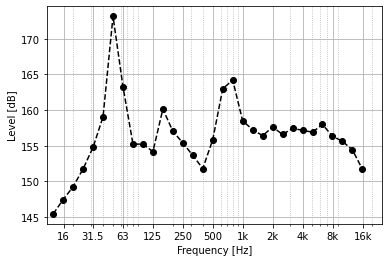

In [10]:
import matplotlib.pyplot as plt

# Show octave spectrum
fig, ax = plt.subplots()
ax.semilogx(freq, spl_st, 'ko--')
# ax.semilogx(freq, spl_dual_mono, 'bo:')
# ax.semilogx(freq, spl_mono_1, 'ro--')
# ax.semilogx(freq, spl_mono_2, 'r:')
# ax.legend(['st','dual mono','mono v1','mono v2'])
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel('Level [dB]')
plt.xlim(11, 25000)
ax.set_xticks([16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000])
ax.set_xticklabels(['16', '31.5', '63', '125', '250', '500', '1k', '2k', '4k', '8k', '16k'])
plt.show()